In [1]:
import datetime
import requests
import ccxt
import numpy as np
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt

In [2]:
def top_crypto(n=100):
    url = "https://api.coingecko.com/api/v3/coins/markets"
    params = {
        "vs_currency": "usd",
        "order": "market_cap_desc",
        "per_page": n,
        "page": 1,
        "sparkline": False,
    }
    
    try:
        response = requests.get(url, params=params)
        response.raise_for_status()
        data = response.json()
        
        return data
    except requests.exceptions.HTTPError as e:
        print("Error retrieving data:", e)
        return None

In [3]:
def get_close_price(tickers, timeframe='1d'):
    data = pd.DataFrame()
    for ticker in tickers:
        try:
            ohlv = ccxt.binance().fetch_ohlcv(f'{ticker}USDT', timeframe, limit=1000)
        except:
            continue
        if ohlv[0][0] > 1704067200000:  # 2024-01-01 00:00:00
            continue
        close = [row[4] for row in ohlv]
        time = [row[0] for row in ohlv]
        data[ticker] = pd.Series(index=time, data=close)
    data.index = pd.to_datetime(data.index, unit='ms')
    return data

In [4]:
def calc_sharpe(log_returns, period=30):
    return log_returns.rolling(period).mean() / log_returns.rolling(period).std()

In [7]:
coins = top_crypto(100)
coins = [c['symbol'].upper() for c in coins]

In [8]:
for c in ['USDC', 'STETH', 'WSTETH', 'WBTC', 'CTB', 'WETH', 'WEETH', 'USDS', 'USDE', 'CBBTC', 'FDUSD', 'RETH', 'LBTC', 'USD0',
         'BNSOL', 'METH', 'SOLVBTC', 'DAI', 'XMR']:
    if c in coins:
        coins.remove(c)

In [10]:
data = get_close_price(coins)

In [11]:
returns = data.pct_change().dropna()

In [12]:
log_returns = np.log(data.dropna() / data.dropna().shift(1)).dropna()

In [13]:
(returns.mean(axis=0) / returns.std(axis=0)).sort_values(ascending=False)[:20]

OM       0.181667
XRP      0.110956
PEPE     0.109496
RAY      0.106770
SUI      0.104534
BNB      0.098105
BTC      0.095909
SOL      0.089300
DOGE     0.086798
JASMY    0.081744
XLM      0.078805
AAVE     0.078436
HBAR     0.078154
FLOKI    0.075408
NEAR     0.061595
TRX      0.061480
ALGO     0.058267
NEXO     0.057005
SHIB     0.056518
UNI      0.056148
dtype: float64

In [14]:
(log_returns.mean(axis=0) / log_returns.std(axis=0)).sort_values(ascending=False)[:20]

OM       0.156109
XRP      0.092327
BNB      0.084333
BTC      0.082976
SUI      0.077612
PEPE     0.075772
RAY      0.075182
SOL      0.067693
DOGE     0.062383
XLM      0.060064
AAVE     0.054384
HBAR     0.052912
TRX      0.052642
JASMY    0.050392
FLOKI    0.042659
NEXO     0.041896
ALGO     0.033611
LTC      0.033276
NEAR     0.033191
BCH      0.032844
dtype: float64

In [15]:
(returns.rolling(30).mean().dropna() / returns.rolling(30).std().dropna()).sum(axis=0).sort_values(ascending=False)[:20]

OM       58.562991
TRX      40.082491
BTC      34.321311
SUI      33.101591
BNB      32.219698
PEPE     30.166639
RAY      27.119859
AAVE     26.886720
SOL      26.591417
DOGE     23.005983
NEXO     20.990025
JASMY    20.833631
XRP      20.124281
ETH      19.848782
FLOKI    17.183045
BONK     15.015633
FET      14.628488
THETA    13.871862
UNI      13.813166
LTC      13.658396
dtype: float64

In [16]:
(log_returns.rolling(30).mean().dropna() / log_returns.rolling(30).std().dropna()).sum(axis=0).sort_values(ascending=False)[:20]

OM       48.875394
TRX      36.162767
BTC      30.001286
BNB      27.471243
SUI      24.014949
PEPE     19.528602
SOL      19.186755
AAVE     19.009787
RAY      16.327624
NEXO     15.841890
DOGE     15.277407
ETH      14.608608
XRP      14.417604
JASMY    10.977411
LTC       7.368456
FLOKI     7.269479
UNI       6.259878
LINK      5.735880
THETA     5.430220
BCH       4.676048
dtype: float64

In [17]:
(returns[-120:].rolling(30).mean().dropna() / returns[-120:].rolling(30).std().dropna()).sum(axis=0).sort_values(ascending=False)[:20]

XRP      23.163063
DOGE     16.630374
SUI      16.342772
ADA      16.115011
BTC      16.096879
HBAR     15.698618
RAY      15.434257
XLM      14.799114
ALGO     14.205572
AAVE     12.913457
LINK     12.191294
LTC      11.596560
NEXO     11.385091
UNI      10.638450
OM       10.061013
VET       9.575167
SOL       9.463511
GALA      9.344719
LDO       9.069380
THETA     8.756065
dtype: float64

In [19]:
(returns[-90:].rolling(30).mean().dropna() / returns[-90:].rolling(30).std().dropna()).sum(axis=0).sort_values(ascending=False)[:20]

XRP      18.108778
HBAR     13.355695
AAVE     11.339578
ALGO     10.837722
SUI      10.293972
ADA       9.567668
XLM       8.734346
LINK      8.384514
LDO       7.952297
THETA     7.742666
VET       7.675413
UNI       7.465758
LTC       7.337655
BTC       7.132287
QNT       6.765382
GALA      6.734991
NEXO      6.598466
OM        6.174964
FIL       5.678094
JASMY     5.638007
dtype: float64

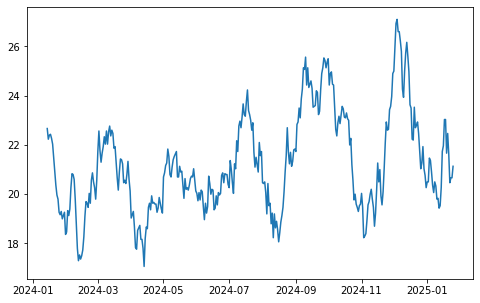

In [18]:
n_outperform_btc = (returns.iloc[:, 1:].gt(returns['BTC'], axis=0)).sum(axis=1)

plt.figure(figsize=(8, 5))
plt.plot(n_outperform_btc.rolling(30).mean())
plt.show()